In [15]:
import cmsisdsp as cmsis

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal

from filt_plot_funcs import *

In [16]:
fs = 200

In [17]:
scale_factor = 3.3

### Low Pass Filter

In [18]:
b_low, a_low = signal.iirfilter(N=4, Wn=40, btype='lowpass', rs=10, ftype='cheby2', output='ba', fs=fs)


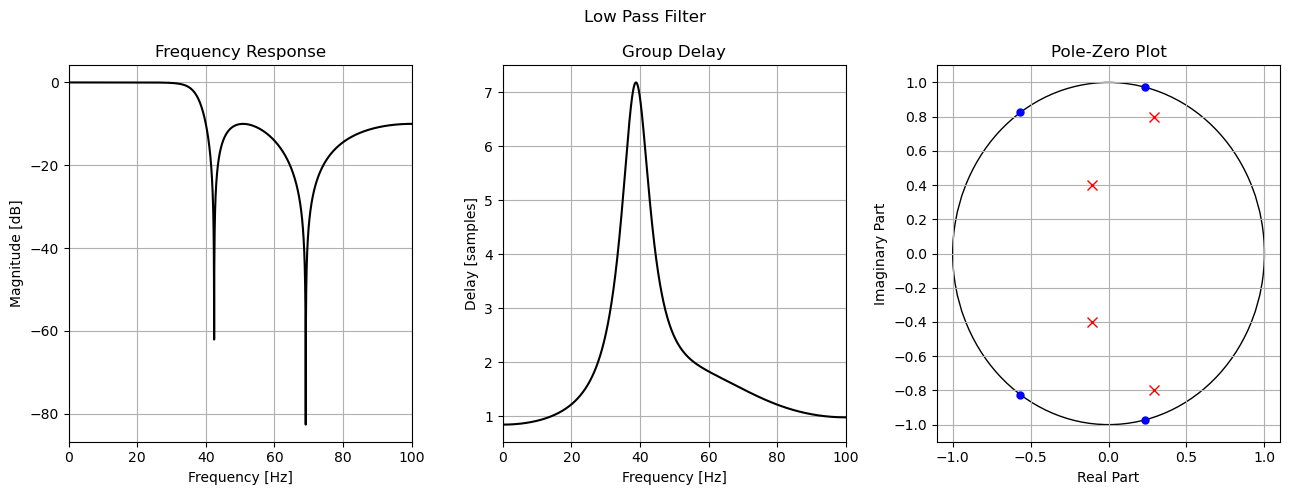

In [19]:
fig_low, axs_low = plt.subplots(1, 3, tight_layout=True, figsize=[13, 5])
plot_freq_domain(b_low, a_low, fs=fs, in_dB=True, ax1=axs_low[0], ax2=axs_low[1], filt_name='Low Pass Filter')
plot_pole_zero(b_low, a_low, ax=axs_low[2])


In [20]:
b_low_q31 = cmsis.arm_float_to_q31(b_low / scale_factor)
a_low_q31 = cmsis.arm_float_to_q31(a_low / scale_factor)

In [21]:
print(max(b_high))
print(max(a_high))

print(max(b_low))
print(max(b_high))


0.9885177683120641
1.0
0.47982309014754815
0.9885177683120641


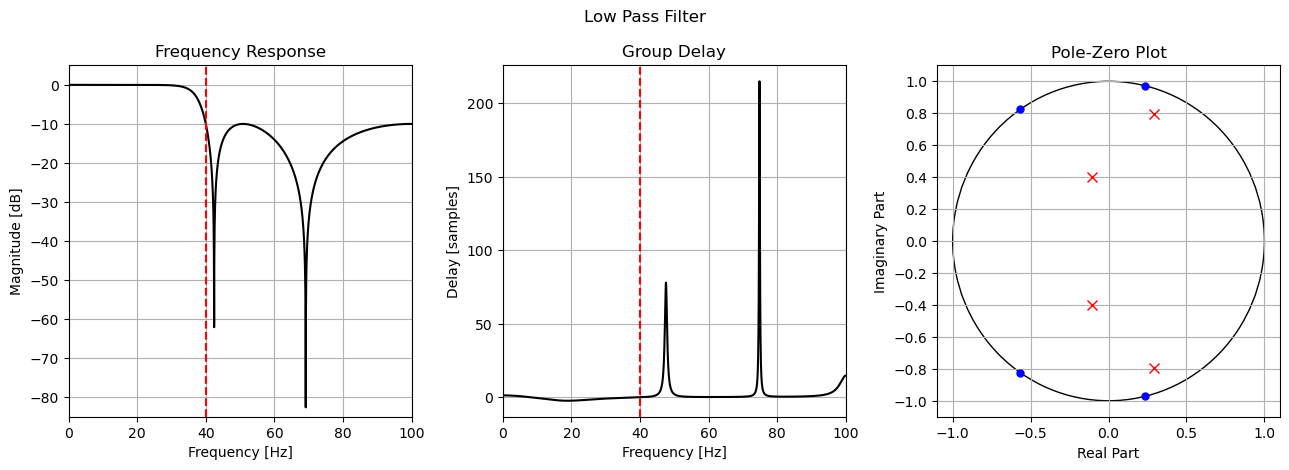

In [22]:
fig_low_q31, axs_low_q31 = plt.subplots(1, 3, tight_layout=True, figsize=[13, 4.75])
plot_freq_domain(b_low_q31, a_low_q31, fs=fs, in_dB=True, ax1=axs_low_q31[0], ax2=axs_low_q31[1], filt_name='Low Pass Filter')
plot_pole_zero(b_low_q31, a_low_q31, ax=axs_low_q31[2])

axs_low_q31[0].set_ylim([-85, 5])

for ax in axs_low_q31:
    plt.sca(ax)
    plt.axvline(40, linestyle='--', color='r')


### High Pass Filter

In [23]:
b_high, a_high = signal.iirfilter(N=2, Wn=0.5, btype='highpass', rs=10, ftype='cheby2', output='ba', fs=fs)


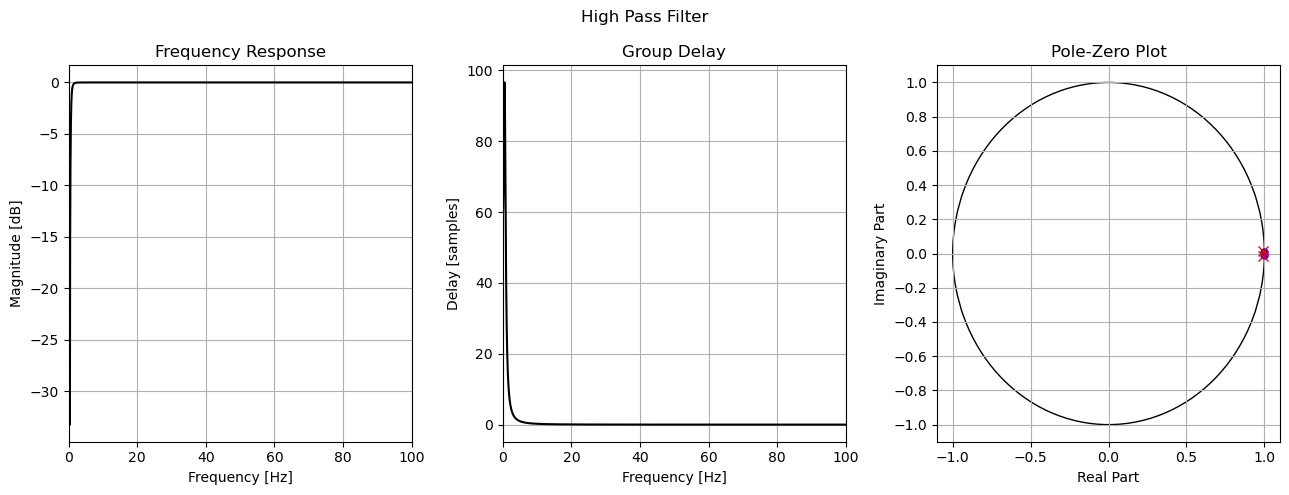

In [24]:
fig_high, axs_high = plt.subplots(1, 3, tight_layout=True, figsize=[13, 5])
plot_freq_domain(b_high, a_high, fs=fs, in_dB=True, ax1=axs_high[0], ax2=axs_high[1], filt_name='High Pass Filter')
plot_pole_zero(b_high, a_high, ax=axs_high[2])


In [25]:
b_high_q31 = cmsis.arm_float_to_q31(b_high / scale_factor)
a_high_q31 = cmsis.arm_float_to_q31(a_high / scale_factor)


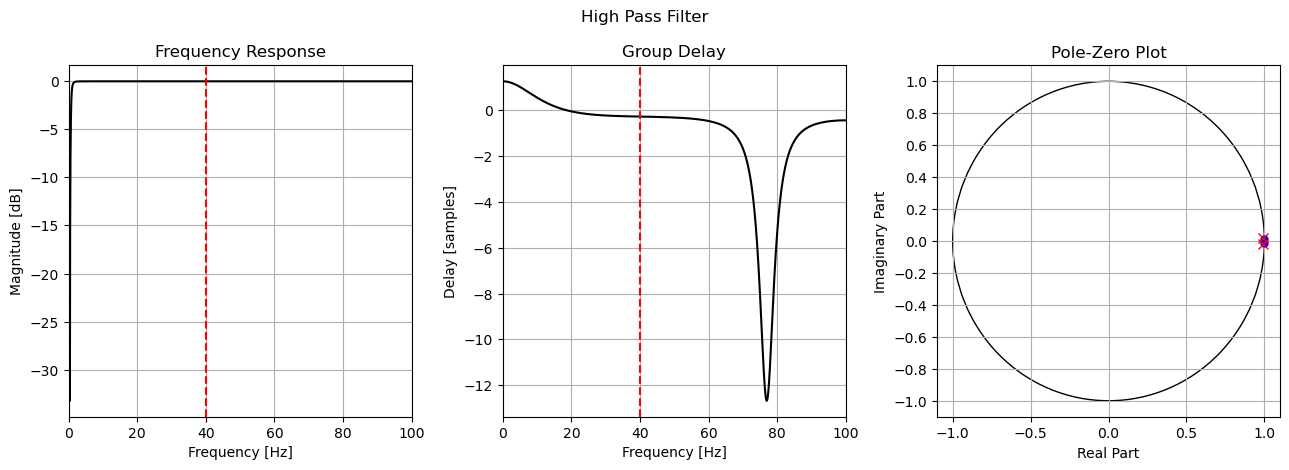

In [26]:
fig_high_q31, axs_high_q31 = plt.subplots(1, 3, tight_layout=True, figsize=[13, 4.75])
plot_freq_domain(b_high_q31, a_high_q31, fs=fs, in_dB=True, ax1=axs_high_q31[0], ax2=axs_high_q31[1], filt_name='High Pass Filter')
plot_pole_zero(b_high_q31, a_high_q31, ax=axs_high_q31[2])

for ax in axs_high_q31[:-1]:
    plt.sca(ax)
    plt.axvline(40, linestyle='--', color='r')
